In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH_TWEETS = "../dados/processados/serie_tweets.xlsx"
PATH_ISOL = "../dados/processados/isolamento_social.xlsx"

# Carregando dados

In [3]:
isolamento_df = pd.read_excel(PATH_ISOL, header=1, usecols=["Data", "Tx Isolamento"])
isolamento_df.columns = ["data", "taxa_de_isolamento"]
isolamento_df.set_index("data", inplace=True)


In [4]:
isolamento_df.head()

,taxa_de_isolamento
data,
2020-03-01,42.0
2020-03-02,27.7
2020-03-03,29.0
2020-03-04,30.2
2020-03-05,29.7


In [5]:
serie_tweets_df = pd.read_excel(PATH_TWEETS)
serie_tweets_df.set_index("data", inplace=True)

In [6]:
serie_tweets_df.head()

,positivos,neutros,negativos,total
data,,,,
2020-03-13,0.135952,0.360692,0.503357,5958
2020-03-20,0.201570,0.401416,0.397014,84055
2020-03-27,0.186158,0.328647,0.485195,48867
2020-04-03,0.196989,0.312050,0.490961,29428
2020-04-10,0.200878,0.301567,0.497555,28017


# Combinando séries temporais de tweets e de isolamento social

In [7]:
serie_tweets_df = serie_tweets_df.join(isolamento_df)
serie_tweets_df["isolamento_pct"] = serie_tweets_df["taxa_de_isolamento"] / 100

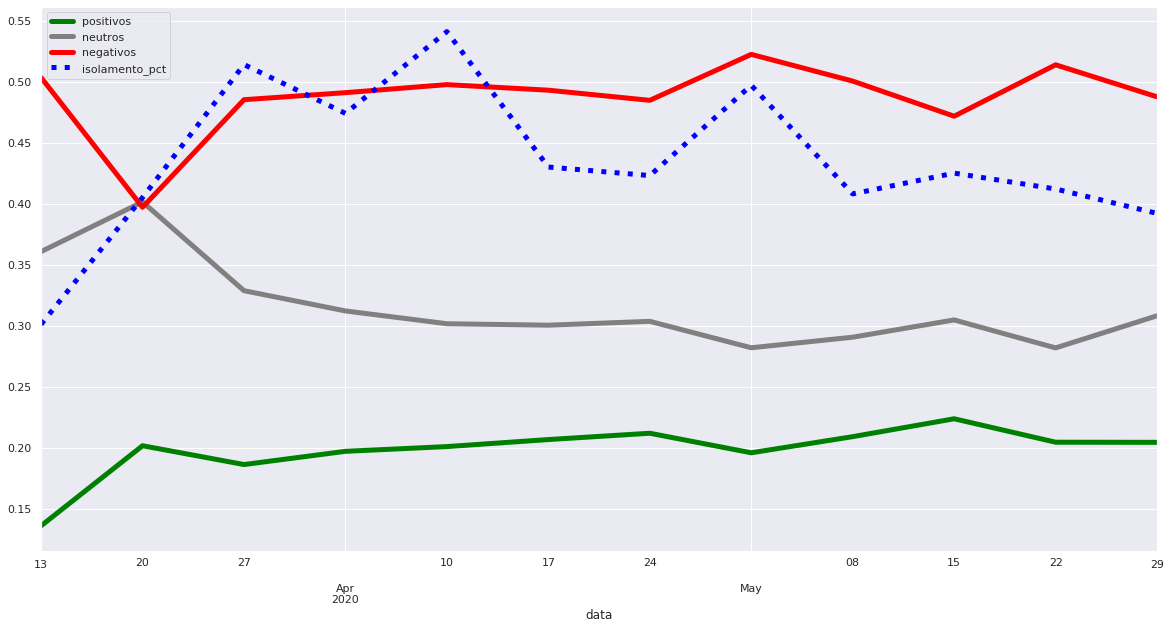

In [8]:
serie_tweets_df.drop(columns=["total", "taxa_de_isolamento"]).plot(linewidth=5, color=["green", "gray", "red", "blue"], style=["-", "-", "-", ":"])

# Analisando correlação entre os atributos

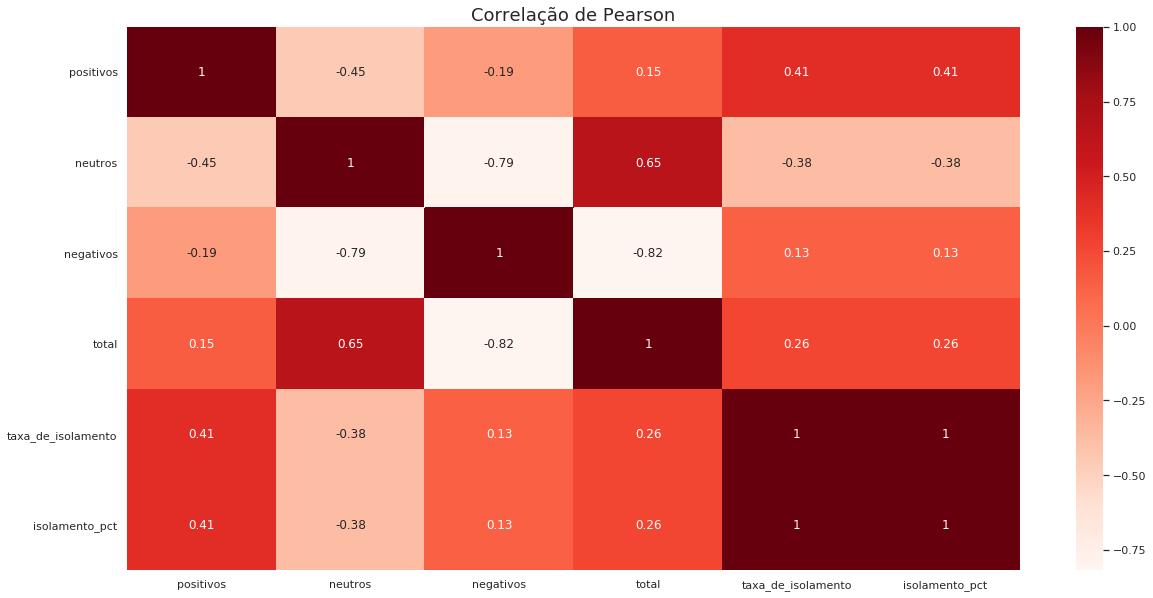

In [9]:
correlation = serie_tweets_df.corr()

_ = sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds).set_title("Correlação de Pearson", size=18)

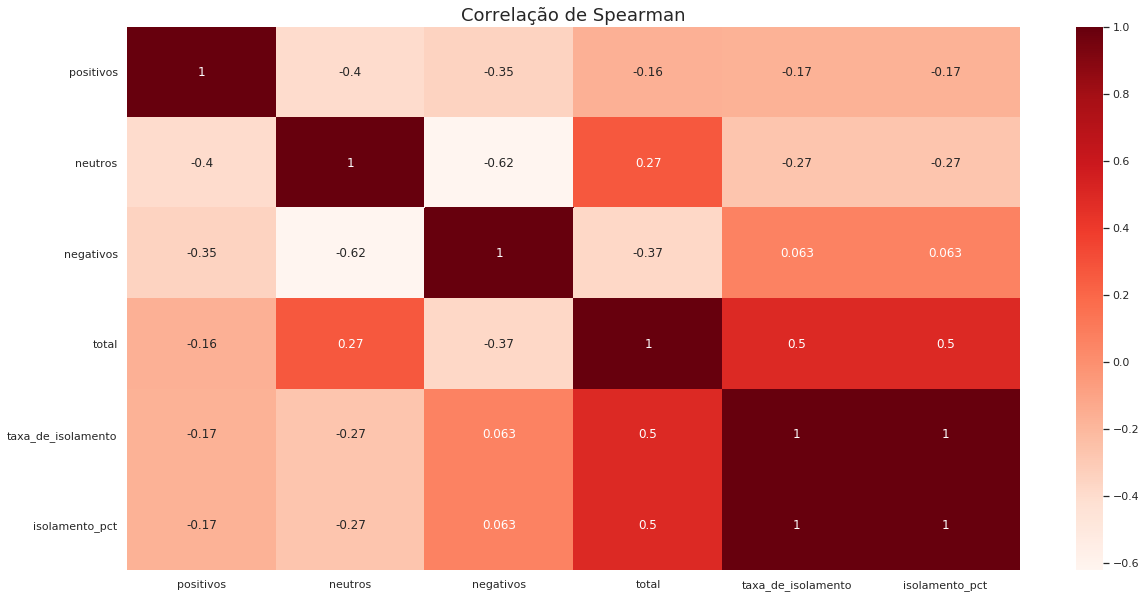

In [10]:
correlation = serie_tweets_df.corr(method="spearman")
_ = sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds).set_title("Correlação de Spearman", size=18)

In [12]:
serie_tweets_df.to_csv("../dados/processados/serie_tweets_isolamento.csv")